# Overview
### Section 1 of Overview
### Section 2 of Overview
### Section 3 of Overview

## Loading in & Investigating Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading in the CSV file 
file_path = 'archive/HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

#Checking the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)  

#Displaying the head
df.head()


Shape of the DataFrame: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Checking column names and null count
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
#Calculating the value counts and percentages for the Attrition column
attrition_counts = df['Attrition'].value_counts()

attrition_percentages = df['Attrition'].value_counts(normalize=True) * 100

print("Attrition Counts:\n", attrition_counts)
print("\nAttrition Percentages:\n", attrition_percentages)

Attrition Counts:
 No     1233
Yes     237
Name: Attrition, dtype: int64

Attrition Percentages:
 No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


## Creating Logistic Regression Model

The baseline logistic regression model shows strong performance on the test data, with an accuracy of 86.05%. For class 0 (non-attrition), the precision is 0.88, recall is 0.96, and F1-score is 0.92, indicating that the model is very good at correctly identifying non-attrition cases and has a low false positive rate. However, for class 1 (attrition), the model's performance is lower, with a precision of 0.62, recall of 0.34, and F1-score of 0.44. The confusion matrix for the test data reveals that the model correctly identified 237 non-attrition cases and 16 attrition cases, but it also misclassified 31 attrition cases as non-attrition and 10 non-attrition cases as attrition.
Overall, the baseline logistic regression model performs well in identifying non-attrition cases but has difficulty accurately identifying attrition cases.

In [8]:
from sklearn.model_selection import train_test_split
#Doing a stratified train test split because of data imbalance and checking distributions
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_distribution = y_train.value_counts(normalize=True) * 100
print("Training Set Distribution:\n", train_distribution)

test_distribution = y_test.value_counts(normalize=True) * 100
print("\nTest Set Distribution:\n", test_distribution)


Training Set Distribution:
 No     83.843537
Yes    16.156463
Name: Attrition, dtype: float64

Test Set Distribution:
 No     84.013605
Yes    15.986395
Name: Attrition, dtype: float64


In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#One hot encoding categorical variables and label encoding target
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Gender']

ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(X_train[categorical_cols])

X_train_encoded = ohe.transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names(categorical_cols))

X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print(X_train.shape, X_test.shape)


(1176, 47) (294, 47)


In [10]:
from sklearn.preprocessing import StandardScaler

#Scaling the Data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(1176, 47) (294, 47)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Running and evaluating logistic regression model
baseline_model = LogisticRegression(random_state=42)

baseline_model.fit(X_train_scaled, y_train)

y_pred = baseline_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8605442176870748
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
 [[237  10]
 [ 31  16]]


Baseline Model Training Performance
Training Accuracy: 0.9013605442176871
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       986
           1       0.82      0.50      0.62       190

    accuracy                           0.90      1176
   macro avg       0.86      0.74      0.78      1176
weighted avg       0.90      0.90      0.89      1176

Training Confusion Matrix:
[[965  21]
 [ 95  95]]
Baseline Model Test Performance
Test Accuracy: 0.8605442176870748
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Test Confusion Matrix:
[[237  10]
 [ 31  16]]


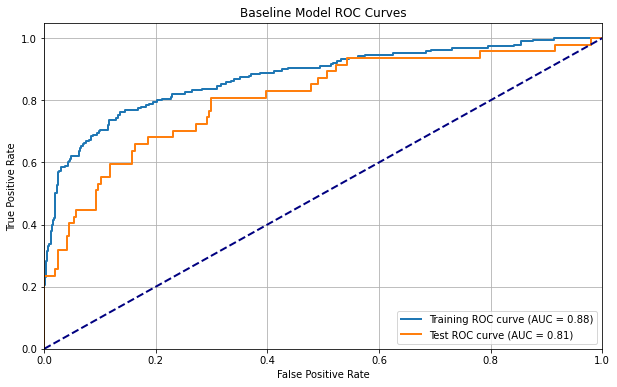

In [12]:
#Comparing the model's performance on the training vs validation data
y_train_pred_baseline = baseline_model.predict(X_train_scaled)
accuracy_train_baseline = accuracy_score(y_train, y_train_pred_baseline)
report_train_baseline = classification_report(y_train, y_train_pred_baseline)
confusion_train_baseline = confusion_matrix(y_train, y_train_pred_baseline)
y_train_score_baseline = baseline_model.decision_function(X_train_scaled)
fpr_train_baseline, tpr_train_baseline, thresholds_train_baseline = roc_curve(y_train, y_train_score_baseline)
roc_auc_train_baseline = auc(fpr_train_baseline, tpr_train_baseline)

y_test_pred_baseline = baseline_model.predict(X_test_scaled)
accuracy_test_baseline = accuracy_score(y_test, y_test_pred_baseline)
report_test_baseline = classification_report(y_test, y_test_pred_baseline)
confusion_test_baseline = confusion_matrix(y_test, y_test_pred_baseline)
y_test_score_baseline = baseline_model.decision_function(X_test_scaled)
fpr_test_baseline, tpr_test_baseline, thresholds_test_baseline = roc_curve(y_test, y_test_score_baseline)
roc_auc_test_baseline = auc(fpr_test_baseline, tpr_test_baseline)

print("Baseline Model Training Performance")
print(f"Training Accuracy: {accuracy_train_baseline}")
print(f"Training Classification Report:\n{report_train_baseline}")
print(f"Training Confusion Matrix:\n{confusion_train_baseline}")

print("Baseline Model Test Performance")
print(f"Test Accuracy: {accuracy_test_baseline}")
print(f"Test Classification Report:\n{report_test_baseline}")
print(f"Test Confusion Matrix:\n{confusion_test_baseline}")

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_baseline, tpr_train_baseline, lw=2, label='Training ROC curve (AUC = {:.2f})'.format(roc_auc_train_baseline))
plt.plot(fpr_test_baseline, tpr_test_baseline, lw=2, label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test_baseline))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline Model ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Investigating Different Parameters for New Logistic Regression Model

In the process of tuning the logistic regression model, I investigated various parameters and their effects on model performance. The best model without applying SMOTE achieved an AUC of 0.81 and an accuracy of 0.86. This indicates that the model performed well in distinguishing between attrition and non-attrition cases without needing to balance the class distribution through SMOTE. Models that had applied SMOTE were also found to have inferior AUC scores compared to those without. Various levels of class balancing were also tested, but the best model was found to be the one without any class weight adjustment, achieving the same AUC of 0.81 and accuracy of 0.86. This suggests that adjusting class weights did not significantly improve the model's ability to differentiate between classes, implying that the class imbalance may not be severely impacting performance. The optimal configuration for the logistic regression model involved using the lbfgs solver with l2 regularization, which also resulted in an AUC of 0.81 and an accuracy of 0.86. The lbfgs solver is efficient for logistic regression, and the l2 penalty helps in preventing overfitting by adding a regularization term to the model.

In [13]:
#Defining a function to train and evaluate a logistic regression model with optional smote and class weight adjustments
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def train_and_evaluate(X_train, y_train, X_test, y_test, class_weight=None, use_smote=False, solver='lbfgs', penalty='l2', C=1.0):
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    
    model = LogisticRegression(random_state=42, class_weight=class_weight, solver=solver, penalty=penalty, C=C, max_iter=1000)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    y_score = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    return accuracy, report, confusion, fpr, tpr, roc_auc


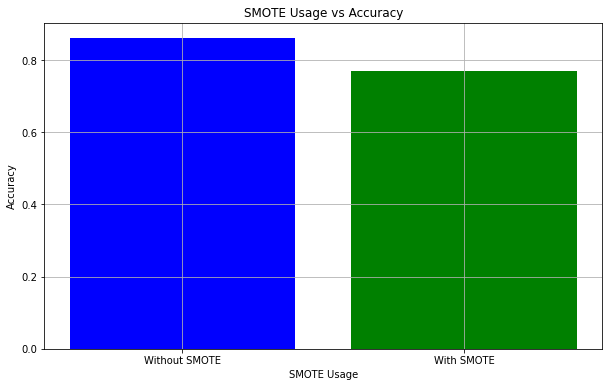

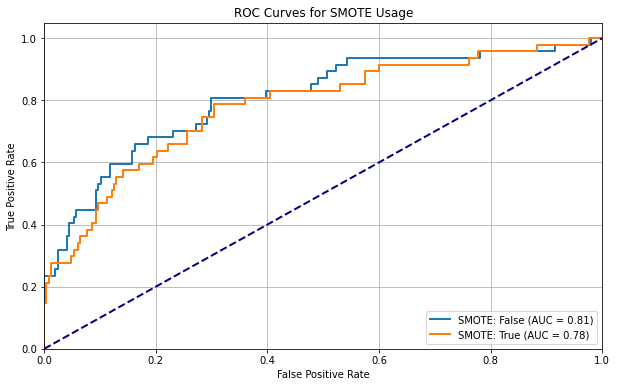

In [14]:
#Training and evaluating logistic regression models with and without SMOTE, then comparing their accuracy and ROC curves

smote_results = []

for use_smote in [False, True]:
    accuracy, report, confusion, fpr, tpr, roc_auc = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, use_smote=use_smote)
    smote_results.append({'use_smote': use_smote, 'accuracy': accuracy, 'report': report, 'confusion': confusion, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc})

smote_labels = ['Without SMOTE', 'With SMOTE']
smote_accuracies = [result['accuracy'] for result in smote_results]
plt.figure(figsize=(10, 6))
plt.bar(smote_labels, smote_accuracies, color=['blue', 'green'])
plt.xlabel('SMOTE Usage')
plt.ylabel('Accuracy')
plt.title('SMOTE Usage vs Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for result in smote_results:
    plt.plot(result['fpr'], result['tpr'], lw=2, label='SMOTE: {} (AUC = {:.2f})'.format(result['use_smote'], result['roc_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SMOTE Usage')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


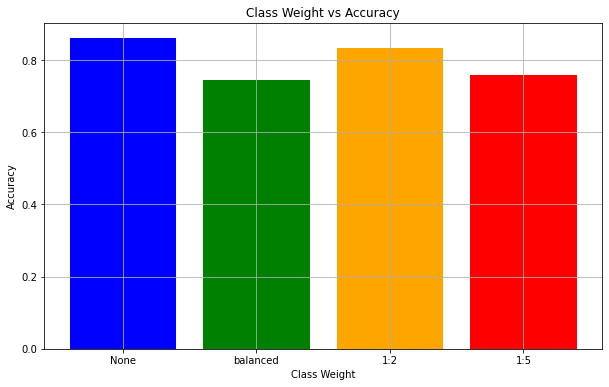

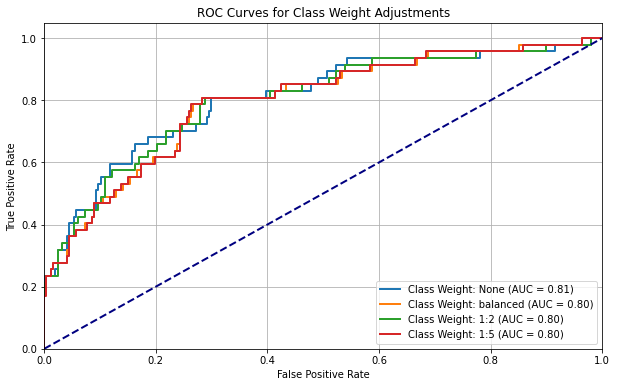

In [15]:
#Training and evaluating logistic regression models with different class weights, then comparing their accuracy and ROC curves

class_weights = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}]
class_weight_results = []

for weight in class_weights:
    accuracy, report, confusion, fpr, tpr, roc_auc = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, class_weight=weight)
    class_weight_results.append({'class_weight': weight, 'accuracy': accuracy, 'report': report, 'confusion': confusion, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc})

class_weight_labels = ['None', 'balanced', '1:2', '1:5']
class_weight_accuracies = [result['accuracy'] for result in class_weight_results]
plt.figure(figsize=(10, 6))
plt.bar(class_weight_labels, class_weight_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Class Weight')
plt.ylabel('Accuracy')
plt.title('Class Weight vs Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for result in class_weight_results:
    label = 'balanced' if result['class_weight'] == 'balanced' else 'None' if result['class_weight'] is None else '1:{}'.format(result['class_weight'][1])
    plt.plot(result['fpr'], result['tpr'], lw=2, label='Class Weight: {} (AUC = {:.2f})'.format(label, result['roc_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Class Weight Adjustments')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


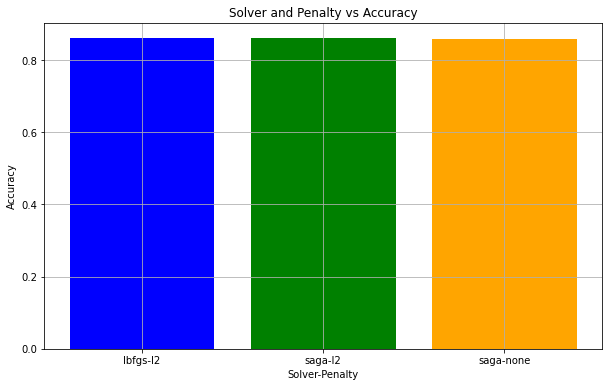

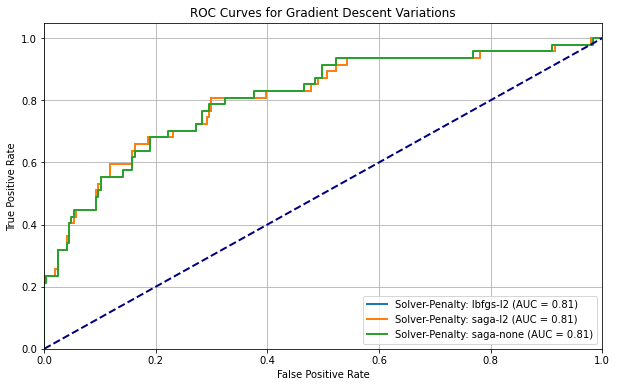

In [16]:
#Training and evaluating logistic regression models with different solvers and penalties, then comparing their accuracy and ROC curves
#Suppressing convergence warning

import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=ConvergenceWarning)

solvers = ['lbfgs', 'saga']
penalties = ['l2', 'none']
gradient_descent_results = []

for solver in solvers:
    for penalty in penalties:
        if solver == 'lbfgs' and penalty == 'none':
            continue  
        accuracy, report, confusion, fpr, tpr, roc_auc = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, solver=solver, penalty=penalty)
        gradient_descent_results.append({'solver': solver, 'penalty': penalty, 'accuracy': accuracy, 'report': report, 'confusion': confusion, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc})


solver_penalty_labels = [f'{result["solver"]}-{result["penalty"]}' for result in gradient_descent_results]
gradient_descent_accuracies = [result['accuracy'] for result in gradient_descent_results]
plt.figure(figsize=(10, 6))
plt.bar(solver_penalty_labels, gradient_descent_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Solver-Penalty')
plt.ylabel('Accuracy')
plt.title('Solver and Penalty vs Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for result in gradient_descent_results:
    plt.plot(result['fpr'], result['tpr'], lw=2, label='Solver-Penalty: {} (AUC = {:.2f})'.format(result["solver"] + '-' + result["penalty"], result['roc_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Gradient Descent Variations')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [17]:
#Finding the best model configurations for SMOTE, class weight adjustments, and gradient descent based on AUC and accuracy

best_smote_result = max(smote_results, key=lambda x: x['roc_auc'])

smote_text = "with SMOTE" if best_smote_result['use_smote'] else "without SMOTE"

print(f"The best model {smote_text} achieved an AUC of {best_smote_result['roc_auc']:.2f} and an accuracy of {best_smote_result['accuracy']:.2f}.")

best_class_weight_result = max(class_weight_results, key=lambda x: x['roc_auc'])

if best_class_weight_result['class_weight'] is None:
    class_weight_text = "without class weight adjustment"
elif best_class_weight_result['class_weight'] == 'balanced':
    class_weight_text = "with balanced class weight"
else:
    class_weight_text = f"with class weight 1:{best_class_weight_result['class_weight'][1]}"

print(f"The best model {class_weight_text} achieved an AUC of {best_class_weight_result['roc_auc']:.2f} and an accuracy of {best_class_weight_result['accuracy']:.2f}.")

best_gradient_descent_result = max(gradient_descent_results, key=lambda x: x['roc_auc'])

solver = best_gradient_descent_result['solver']
penalty = best_gradient_descent_result['penalty']

print(f"The best model using {solver} solver and {penalty} penalty achieved an AUC of {best_gradient_descent_result['roc_auc']:.2f} and an accuracy of {best_gradient_descent_result['accuracy']:.2f}.")


The best model without SMOTE achieved an AUC of 0.81 and an accuracy of 0.86.
The best model without class weight adjustment achieved an AUC of 0.81 and an accuracy of 0.86.
The best model using lbfgs solver and l2 penalty achieved an AUC of 0.81 and an accuracy of 0.86.


## Comparing Baseline and Regularized Logistic Regression Models

Upon attempting to create another logistic regression model using the identified optimal parameters, I observed that the performance metrics—AUC of 0.81 and accuracy of 0.86—remained unchanged. This prompted the realization that the lbfgs solver with l2 regularization, without applying SMOTE or class weight adjustments, were in fact the default parameters for logistic regression in scikit-learn. Consequently, the model's performance did not improve because it was already operating with these optimal default settings. This insight underscores the efficiency of the default parameters for this specific classification task, as further tuning did not yield better results.

Baseline Model with Cross-Validation
Cross-validation scores: [0.72634237 0.87389794 0.84931873 0.84504408 0.87670318]
Mean AUC: 0.8343
Standard Deviation AUC: 0.0554
Accuracy: 0.8605442176870748
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
[[237  10]
 [ 31  16]]


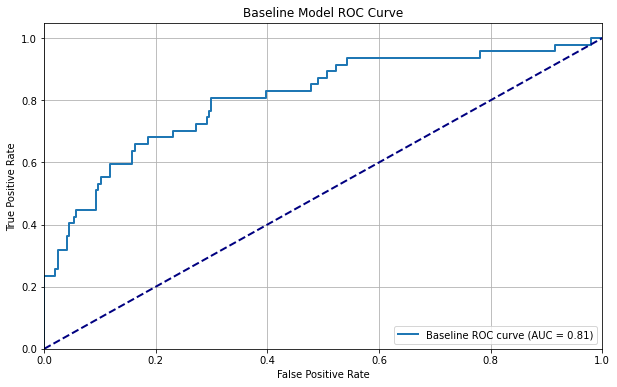

In [19]:
#Evaluating my baseline logistic regression model using cross-validation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

baseline_model = LogisticRegression(random_state=42)

cv_scores_baseline = cross_val_score(baseline_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)
confusion_baseline = confusion_matrix(y_test, y_pred_baseline)
y_score_baseline = baseline_model.decision_function(X_test_scaled)
fpr_baseline, tpr_baseline, thresholds_baseline = roc_curve(y_test, y_score_baseline)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

print("Baseline Model with Cross-Validation")
print(f"Cross-validation scores: {cv_scores_baseline}")
print(f"Mean AUC: {cv_scores_baseline.mean():.4f}")
print(f"Standard Deviation AUC: {cv_scores_baseline.std():.4f}")
print(f"Accuracy: {accuracy_baseline}")
print(f"Classification Report:\n{report_baseline}")
print(f"Confusion Matrix:\n{confusion_baseline}")

plt.figure(figsize=(10, 6))
plt.plot(fpr_baseline, tpr_baseline, lw=2, label='Baseline ROC curve (AUC = {:.2f})'.format(roc_auc_baseline))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline Model ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Best Model with Cross-Validation
Cross-validation scores: [0.72634237 0.87389794 0.84931873 0.84504408 0.87670318]
Mean AUC: 0.8343
Standard Deviation AUC: 0.0554
Accuracy: 0.8605442176870748
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
[[237  10]
 [ 31  16]]


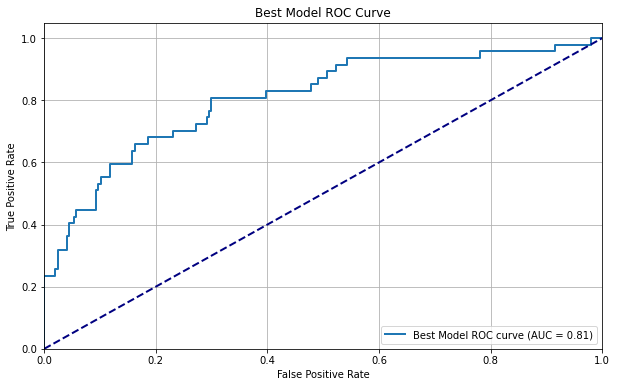

In [20]:
#Evaluating my logistic regression model with optimal parameters using cross-validation
best_model = LogisticRegression(random_state=42, solver='lbfgs', penalty='l2', C=1.0, max_iter=1000)

cv_scores_best = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
y_score_best = best_model.decision_function(X_test_scaled)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_score_best)
roc_auc_best = auc(fpr_best, tpr_best)

print("Best Model with Cross-Validation")
print(f"Cross-validation scores: {cv_scores_best}")
print(f"Mean AUC: {cv_scores_best.mean():.4f}")
print(f"Standard Deviation AUC: {cv_scores_best.std():.4f}")
print(f"Accuracy: {accuracy_best}")
print(f"Classification Report:\n{report_best}")
print(f"Confusion Matrix:\n{confusion_best}")

plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, lw=2, label='Best Model ROC curve (AUC = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Model ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Here I realized that both of my models are actually identical. Apparently the ideal parameters that I selected for my "best model" were the same as the default parameters. 

## Creating Decision Tree and Comparing Performance

Compare original decision tree model to logistic regression model 

In [21]:
#Initializing and fittinhg a decision tree model on the training data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
#Predicting and evaluating the decision tree model on the training data
y_train_pred_dt = dt_model.predict(X_train_scaled)

accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
report_train_dt = classification_report(y_train, y_train_pred_dt)
confusion_train_dt = confusion_matrix(y_train, y_train_pred_dt)

print("Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Training Classification Report:\n{report_train_dt}")
print(f"Training Confusion Matrix:\n{confusion_train_dt}")


Decision Tree Training Performance
Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

Training Confusion Matrix:
[[986   0]
 [  0 190]]


In [23]:
#Predicting and evaluating the decision tree model on the test data
y_test_pred_dt = dt_model.predict(X_test_scaled)

accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
report_test_dt = classification_report(y_test, y_test_pred_dt)
confusion_test_dt = confusion_matrix(y_test, y_test_pred_dt)

print("Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_dt}")
print(f"Test Classification Report:\n{report_test_dt}")
print(f"Test Confusion Matrix:\n{confusion_test_dt}")

Decision Tree Test Performance
Test Accuracy: 0.7993197278911565
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.36      0.32      0.34        47

    accuracy                           0.80       294
   macro avg       0.62      0.60      0.61       294
weighted avg       0.79      0.80      0.79       294

Test Confusion Matrix:
[[220  27]
 [ 32  15]]


Tremdous overfitting, trying an ID3 Classification Tree instead.

## ID3 Classification Tree

Explain difference between ID3 Classification Tree and Reg Decision Tree and compare performance levels

In [24]:
#Initializing and fitting an ID3 decision tree model with entropy criterion on the training data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

id3_dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)
id3_dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [25]:
#Predicting and evaluating the ID3 decision tree model on training and test data
y_train_pred_id3_dt = id3_dt_model.predict(X_train_scaled)


accuracy_train_id3_dt = accuracy_score(y_train, y_train_pred_id3_dt)
report_train_id3_dt = classification_report(y_train, y_train_pred_id3_dt)
confusion_train_id3_dt = confusion_matrix(y_train, y_train_pred_id3_dt)

print("ID3-like Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_id3_dt}")
print(f"Training Classification Report:\n{report_train_id3_dt}")
print(f"Training Confusion Matrix:\n{confusion_train_id3_dt}")

y_test_pred_id3_dt = id3_dt_model.predict(X_test_scaled)

accuracy_test_id3_dt = accuracy_score(y_test, y_test_pred_id3_dt)
report_test_id3_dt = classification_report(y_test, y_test_pred_id3_dt)
confusion_test_id3_dt = confusion_matrix(y_test, y_test_pred_id3_dt)

print("ID3-like Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_id3_dt}")
print(f"Test Classification Report:\n{report_test_id3_dt}")
print(f"Test Confusion Matrix:\n{confusion_test_id3_dt}")

ID3-like Decision Tree Training Performance
Training Accuracy: 0.8826530612244898
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       986
           1       0.67      0.54      0.60       190

    accuracy                           0.88      1176
   macro avg       0.79      0.74      0.76      1176
weighted avg       0.87      0.88      0.88      1176

Training Confusion Matrix:
[[936  50]
 [ 88 102]]
ID3-like Decision Tree Test Performance
Test Accuracy: 0.8095238095238095
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       247
           1       0.38      0.32      0.35        47

    accuracy                           0.81       294
   macro avg       0.63      0.61      0.62       294
weighted avg       0.80      0.81      0.80       294

Test Confusion Matrix:
[[223  24]
 [ 32  15]]


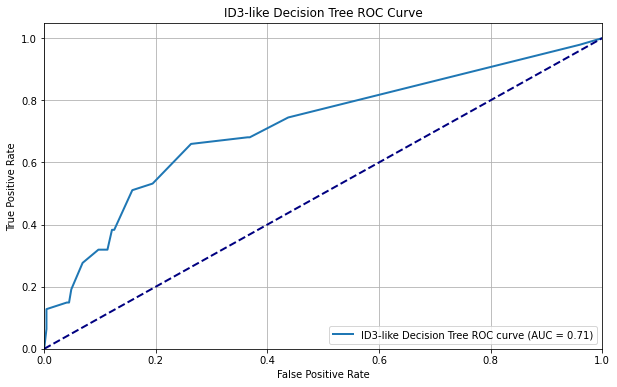

In [26]:
#Predicting and visualizing probabilities with the ID3 decision tree model on test data

y_prob_id3_dt = id3_dt_model.predict_proba(X_test_scaled)[:, 1]

fpr_id3_dt, tpr_id3_dt, thresholds_id3_dt = roc_curve(y_test, y_prob_id3_dt)
roc_auc_id3_dt = auc(fpr_id3_dt, tpr_id3_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_id3_dt, tpr_id3_dt, lw=2, label='ID3-like Decision Tree ROC curve (AUC = {:.2f})'.format(roc_auc_id3_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ID3-like Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Investigating Ideal Parameters for ID3 Decision Tree

Talk about which parameters were optimal

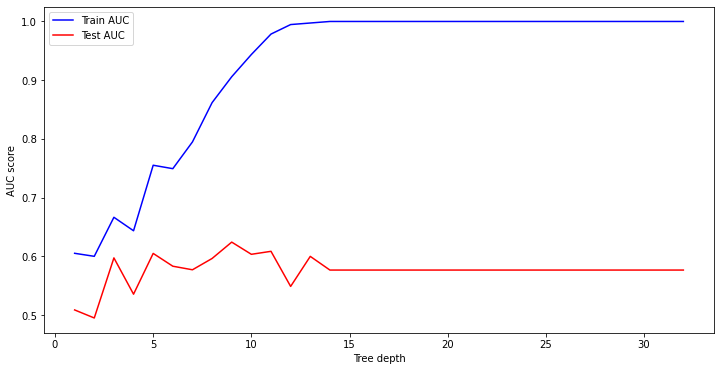

In [27]:
#Evaluating decision tree models with varying max_depth 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

max_depths = list(range(1, 33))
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    test_pred = dt.predict(X_test_scaled)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results.append(roc_auc_test)

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


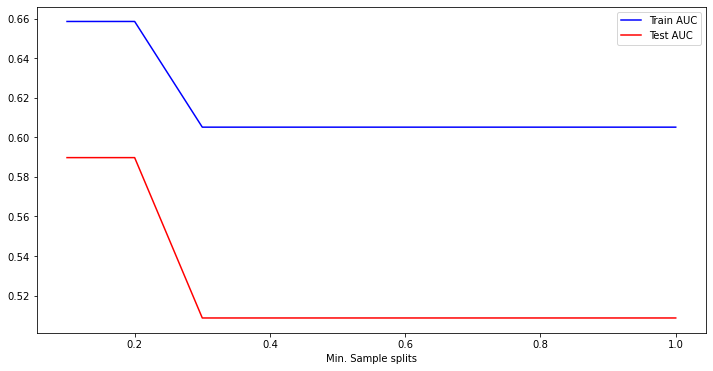

In [28]:
#Evaluating decision tree models with varying min samples split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    test_pred = dt.predict(X_test_scaled)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results.append(roc_auc_test)

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()


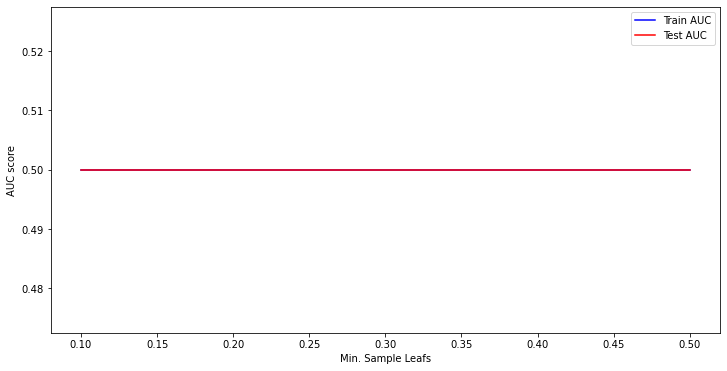

In [29]:
#Evaluating decision tree models with varying min samples leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    test_pred = dt.predict(X_test_scaled)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results.append(roc_auc_test)

plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()


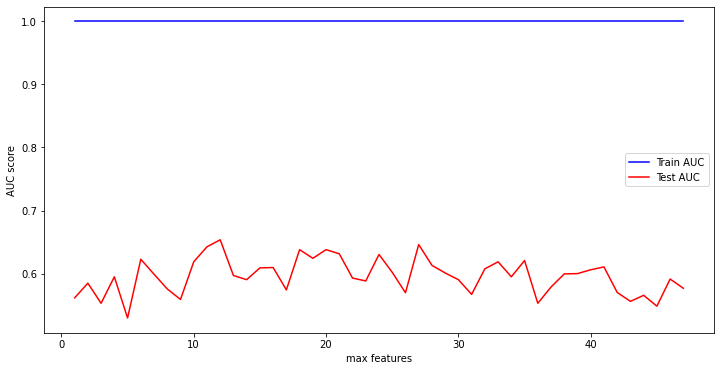

In [30]:
#Evaluating decision tree models with varying max features
max_features = list(range(1, X_train_scaled.shape[1] + 1))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_pred = dt.predict(X_train_scaled)
    test_pred = dt.predict(X_test_scaled)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results.append(roc_auc_test)

plt.figure(figsize=(12, 6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()


In [32]:
#Prnting optimal parameters for decision tree
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

max_depths = list(range(1, 33))
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1, X_train_scaled.shape[1] + 1))

test_results_max_depth = []  
test_results_min_samples_split = []  
test_results_min_samples_leaf = []  
test_results_max_features = []  

for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    test_pred = dt.predict(X_test_scaled)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results_max_depth.append(roc_auc_test)

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train_scaled, y_train)
    test_pred = dt.predict(X_test_scaled)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results_min_samples_split.append(roc_auc_test)

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train_scaled, y_train)
    test_pred = dt.predict(X_test_scaled)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results_min_samples_leaf.append(roc_auc_test)

for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
    dt.fit(X_train_scaled, y_train)
    test_pred = dt.predict(X_test_scaled)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results_max_features.append(roc_auc_test)

optimal_max_depth = max_depths[np.argmax(test_results_max_depth)]
print(f"The optimal max_depth is {optimal_max_depth}.")

optimal_min_samples_split = min_samples_splits[np.argmax(test_results_min_samples_split)]
print(f"The optimal min_samples_split is {optimal_min_samples_split:.2f}.")

optimal_min_samples_leaf = min_samples_leafs[np.argmax(test_results_min_samples_leaf)]
print(f"The optimal min_samples_leaf is {optimal_min_samples_leaf:.2f}.")

optimal_max_features = max_features[np.argmax(test_results_max_features)]
print(f"The optimal max_features is {optimal_max_features}.")


The optimal max_depth is 9.
The optimal min_samples_split is 0.10.
The optimal min_samples_leaf is 0.10.
The optimal max_features is 12.


## Creating New ID3 Decision Tree with Optimal Parameters

Compare ID3 Optimized with regular ID3

Optimized Decision Tree Training Performance
Training Accuracy: 0.8384353741496599
Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176

Training Confusion Matrix:
[[986   0]
 [190   0]]
Optimized Decision Tree Test Performance
Test Accuracy: 0.8401360544217688
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

Test Confusion Matrix:
[[247   0]
 [ 47   0]]


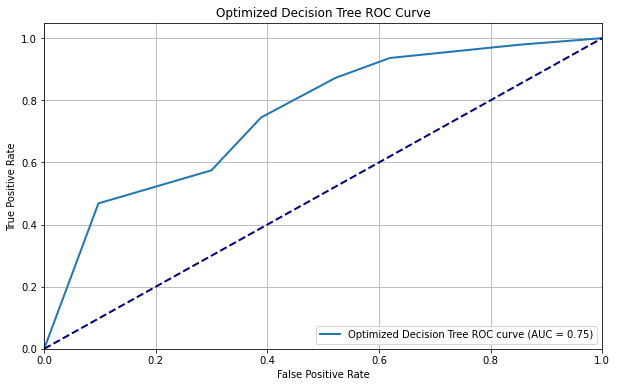

In [33]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Train a classifier with optimal values identified above
dt_optimized = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    min_samples_split=0.1,
    min_samples_leaf=0.1,
    max_features=12,
    random_state=42
)
dt_optimized.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred_optimized = dt_optimized.predict(X_train_scaled)

# Predict on test data
y_test_pred_optimized = dt_optimized.predict(X_test_scaled)

# Evaluate the model on the training data
accuracy_train_optimized = accuracy_score(y_train, y_train_pred_optimized)
report_train_optimized = classification_report(y_train, y_train_pred_optimized)
confusion_train_optimized = confusion_matrix(y_train, y_train_pred_optimized)

print("Optimized Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_optimized}")
print(f"Training Classification Report:\n{report_train_optimized}")
print(f"Training Confusion Matrix:\n{confusion_train_optimized}")

# Evaluate the model on the test data
accuracy_test_optimized = accuracy_score(y_test, y_test_pred_optimized)
report_test_optimized = classification_report(y_test, y_test_pred_optimized)
confusion_test_optimized = confusion_matrix(y_test, y_test_pred_optimized)

print("Optimized Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_optimized}")
print(f"Test Classification Report:\n{report_test_optimized}")
print(f"Test Confusion Matrix:\n{confusion_test_optimized}")

# Predict probabilities for the test set
y_prob_optimized = dt_optimized.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr_optimized, tpr_optimized, thresholds_optimized = roc_curve(y_test, y_prob_optimized)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_optimized, tpr_optimized, lw=2, label='Optimized Decision Tree ROC curve (AUC = {:.2f})'.format(roc_auc_optimized))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Trying More Sets of Parameters for New Decision Trees

Talk about why class weight adjusted was the best

Adjusted Decision Tree Training Performance
Training Accuracy: 0.8886054421768708
Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       986
           1       0.69      0.56      0.62       190

    accuracy                           0.89      1176
   macro avg       0.81      0.76      0.78      1176
weighted avg       0.88      0.89      0.88      1176

Training Confusion Matrix:
[[939  47]
 [ 84 106]]
Adjusted Decision Tree Test Performance
Test Accuracy: 0.7993197278911565
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.36      0.32      0.34        47

    accuracy                           0.80       294
   macro avg       0.62      0.60      0.61       294
weighted avg       0.79      0.80      0.79       294

Test Confusion Matrix:
[[220  27]
 [ 32  15]]


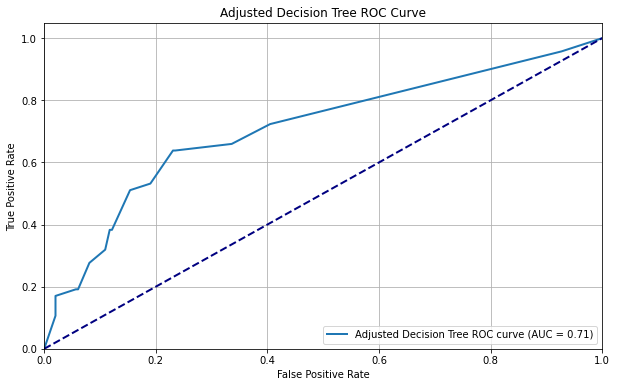

In [59]:
#Train a new decision tree with altered parameters
dt_adjusted = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    max_features=None, 
    random_state=42
)
dt_adjusted.fit(X_train_scaled, y_train)

y_train_pred_adjusted = dt_adjusted.predict(X_train_scaled)

y_test_pred_adjusted = dt_adjusted.predict(X_test_scaled)

accuracy_train_adjusted = accuracy_score(y_train, y_train_pred_adjusted)
report_train_adjusted = classification_report(y_train, y_train_pred_adjusted)
confusion_train_adjusted = confusion_matrix(y_train, y_train_pred_adjusted)

print("Adjusted Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_adjusted}")
print(f"Training Classification Report:\n{report_train_adjusted}")
print(f"Training Confusion Matrix:\n{confusion_train_adjusted}")

accuracy_test_adjusted = accuracy_score(y_test, y_test_pred_adjusted)
report_test_adjusted = classification_report(y_test, y_test_pred_adjusted)
confusion_test_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)

print("Adjusted Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_adjusted}")
print(f"Test Classification Report:\n{report_test_adjusted}")
print(f"Test Confusion Matrix:\n{confusion_test_adjusted}")

y_prob_adjusted = dt_adjusted.predict_proba(X_test_scaled)[:, 1]

fpr_adjusted, tpr_adjusted, thresholds_adjusted = roc_curve(y_test, y_prob_adjusted)
roc_auc_adjusted = auc(fpr_adjusted, tpr_adjusted)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adjusted, tpr_adjusted, lw=2, label='Adjusted Decision Tree ROC curve (AUC = {:.2f})'.format(roc_auc_adjusted))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adjusted Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Class Weight Adjusted Decision Tree Training Performance
Training Accuracy: 0.8418367346938775
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       986
           1       0.51      0.73      0.60       190

    accuracy                           0.84      1176
   macro avg       0.73      0.80      0.75      1176
weighted avg       0.87      0.84      0.85      1176

Training Confusion Matrix:
[[851 135]
 [ 51 139]]
Class Weight Adjusted Decision Tree Test Performance
Test Accuracy: 0.7755102040816326
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       247
           1       0.37      0.55      0.44        47

    accuracy                           0.78       294
   macro avg       0.64      0.69      0.65       294
weighted avg       0.82      0.78      0.79       294

Test Confusion Matrix:
[[202  45]
 [ 21  26]]


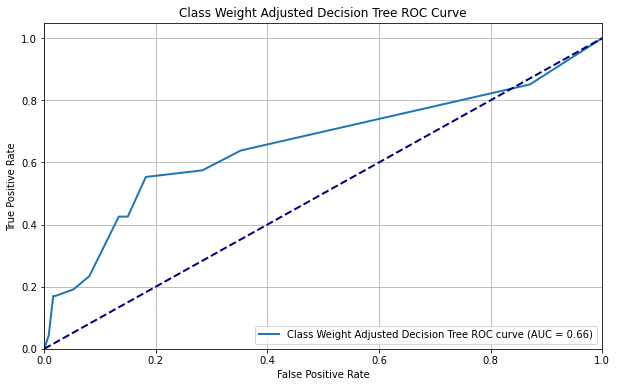

In [60]:
#Training a decision tree with class weight adjustment
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

dt_class_weight = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    max_features=None,  
    class_weight='balanced',  
    random_state=42
)
dt_class_weight.fit(X_train_scaled, y_train)

y_train_pred_class_weight = dt_class_weight.predict(X_train_scaled)

y_test_pred_class_weight = dt_class_weight.predict(X_test_scaled)

accuracy_train_class_weight = accuracy_score(y_train, y_train_pred_class_weight)
report_train_class_weight = classification_report(y_train, y_train_pred_class_weight)
confusion_train_class_weight = confusion_matrix(y_train, y_train_pred_class_weight)

print("Class Weight Adjusted Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_class_weight}")
print(f"Training Classification Report:\n{report_train_class_weight}")
print(f"Training Confusion Matrix:\n{confusion_train_class_weight}")

accuracy_test_class_weight = accuracy_score(y_test, y_test_pred_class_weight)
report_test_class_weight = classification_report(y_test, y_test_pred_class_weight)
confusion_test_class_weight = confusion_matrix(y_test, y_test_pred_class_weight)

print("Class Weight Adjusted Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_class_weight}")
print(f"Test Classification Report:\n{report_test_class_weight}")
print(f"Test Confusion Matrix:\n{confusion_test_class_weight}")

y_prob_class_weight = dt_class_weight.predict_proba(X_test_scaled)[:, 1]

fpr_class_weight, tpr_class_weight, thresholds_class_weight = roc_curve(y_test, y_prob_class_weight)
roc_auc_class_weight = auc(fpr_class_weight, tpr_class_weight)

plt.figure(figsize=(10, 6))
plt.plot(fpr_class_weight, tpr_class_weight, lw=2, label='Class Weight Adjusted Decision Tree ROC curve (AUC = {:.2f})'.format(roc_auc_class_weight))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Class Weight Adjusted Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


SMOTE Adjusted Decision Tree Training Performance
Training Accuracy: 0.8690476190476191
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       986
           1       0.61      0.52      0.56       190

    accuracy                           0.87      1176
   macro avg       0.76      0.73      0.74      1176
weighted avg       0.86      0.87      0.86      1176

Training Confusion Matrix:
[[923  63]
 [ 91  99]]
SMOTE Adjusted Decision Tree Test Performance
Test Accuracy: 0.8163265306122449
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.42      0.40      0.41        47

    accuracy                           0.82       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.81      0.82      0.81       294

Test Confusion Matrix:
[[221  26]
 [ 28  19]]


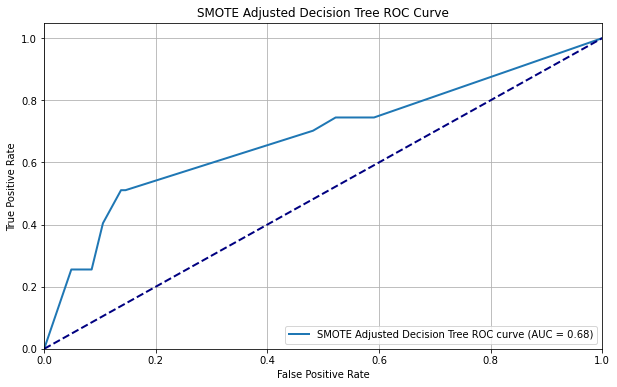

In [61]:
#Training a decision tree with SMOTE-adjusted training data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

dt_smote = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    max_features=None,  
    random_state=42
)
dt_smote.fit(X_train_smote, y_train_smote)

y_train_pred_smote = dt_smote.predict(X_train_scaled)

y_test_pred_smote = dt_smote.predict(X_test_scaled)

accuracy_train_smote = accuracy_score(y_train, y_train_pred_smote)
report_train_smote = classification_report(y_train, y_train_pred_smote)
confusion_train_smote = confusion_matrix(y_train, y_train_pred_smote)

print("SMOTE Adjusted Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_smote}")
print(f"Training Classification Report:\n{report_train_smote}")
print(f"Training Confusion Matrix:\n{confusion_train_smote}")

accuracy_test_smote = accuracy_score(y_test, y_test_pred_smote)
report_test_smote = classification_report(y_test, y_test_pred_smote)
confusion_test_smote = confusion_matrix(y_test, y_test_pred_smote)

print("SMOTE Adjusted Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_smote}")
print(f"Test Classification Report:\n{report_test_smote}")
print(f"Test Confusion Matrix:\n{confusion_test_smote}")

y_prob_smote = dt_smote.predict_proba(X_test_scaled)[:, 1]

fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

plt.figure(figsize=(10, 6))
plt.plot(fpr_smote, tpr_smote, lw=2, label='SMOTE Adjusted Decision Tree ROC curve (AUC = {:.2f})'.format(roc_auc_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE Adjusted Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Fine Tuning My best Performing Model (Class Weight Adjusted Decision Tree

Talk about the fine tuning process done to the best performing model and how it improved it

In [63]:
#Finding the best parameter combinations for accuracy and recall
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
import itertools

max_depth_range = [5, 7, 10]
min_samples_split_range = [2, 5, 10]
min_samples_leaf_range = [1, 2, 4]
max_features_range = [None, 'sqrt', 'log2']

results = []

for max_depth, min_samples_split, min_samples_leaf, max_features in itertools.product(max_depth_range, min_samples_split_range, min_samples_leaf_range, max_features_range):
    dt = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight='balanced',
        random_state=42
    )
    dt.fit(X_train_scaled, y_train)
    
    y_test_pred = dt.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, pos_label=1)
    
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'accuracy': accuracy,
        'recall': recall
    })


results_df = pd.DataFrame(results)

best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
print("Best combination for accuracy:")
print(best_accuracy)

best_recall = results_df.loc[results_df['recall'].idxmax()]
print("Best combination for recall:")
print(best_recall)


Best combination for accuracy:
max_depth                   5
min_samples_split          10
min_samples_leaf            2
max_features             None
accuracy             0.778912
recall               0.574468
Name: 21, dtype: object
Best combination for recall:
max_depth                   5
min_samples_split           2
min_samples_leaf            1
max_features             sqrt
accuracy              0.77551
recall               0.659574
Name: 1, dtype: object


In [64]:
#Making a decision tree with the optimal parameters for recall
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

optimal_params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'class_weight': 'balanced',
    'random_state': 42
}

dt_optimal_recall = DecisionTreeClassifier(**optimal_params)
dt_optimal_recall.fit(X_train_scaled, y_train)

y_train_pred_optimal_recall = dt_optimal_recall.predict(X_train_scaled)

y_test_pred_optimal_recall = dt_optimal_recall.predict(X_test_scaled)

accuracy_train_optimal_recall = accuracy_score(y_train, y_train_pred_optimal_recall)
recall_train_optimal_recall = recall_score(y_train, y_train_pred_optimal_recall, pos_label=1)
report_train_optimal_recall = classification_report(y_train, y_train_pred_optimal_recall)
confusion_train_optimal_recall = confusion_matrix(y_train, y_train_pred_optimal_recall)

print("Optimal Recall Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_optimal_recall}")
print(f"Training Recall: {recall_train_optimal_recall}")
print(f"Training Classification Report:\n{report_train_optimal_recall}")
print(f"Training Confusion Matrix:\n{confusion_train_optimal_recall}")

accuracy_test_optimal_recall = accuracy_score(y_test, y_test_pred_optimal_recall)
recall_test_optimal_recall = recall_score(y_test, y_test_pred_optimal_recall, pos_label=1)
report_test_optimal_recall = classification_report(y_test, y_test_pred_optimal_recall)
confusion_test_optimal_recall = confusion_matrix(y_test, y_test_pred_optimal_recall)

print("Optimal Recall Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_optimal_recall}")
print(f"Test Recall: {recall_test_optimal_recall}")
print(f"Test Classification Report:\n{report_test_optimal_recall}")
print(f"Test Confusion Matrix:\n{confusion_test_optimal_recall}")

cross_val_scores = cross_val_score(dt_optimal_recall, X_train_scaled, y_train, cv=5, scoring='recall')

print("Cross-Validation Recall Scores: ", cross_val_scores)
print("Mean Cross-Validation Recall: ", np.mean(cross_val_scores))
print("Standard Deviation of Cross-Validation Recall: ", np.std(cross_val_scores))


Optimal Recall Decision Tree Training Performance
Training Accuracy: 0.7959183673469388
Training Recall: 0.7421052631578947
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       986
           1       0.42      0.74      0.54       190

    accuracy                           0.80      1176
   macro avg       0.68      0.77      0.70      1176
weighted avg       0.86      0.80      0.82      1176

Training Confusion Matrix:
[[795 191]
 [ 49 141]]
Optimal Recall Decision Tree Test Performance
Test Accuracy: 0.7687074829931972
Test Recall: 0.6595744680851063
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.37      0.66      0.48        47

    accuracy                           0.77       294
   macro avg       0.65      0.72      0.66       294
weighted avg       0.84      0.77      0.79       294



## Final Model

1-3 paragraphs explaining final model and why its the best

In [34]:
#Final model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

optimal_params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'class_weight': 'balanced',
    'random_state': 42
}

dt_optimal_recall = DecisionTreeClassifier(**optimal_params)
dt_optimal_recall.fit(X_train_scaled, y_train)

y_train_pred_optimal_recall = dt_optimal_recall.predict(X_train_scaled)

y_test_pred_optimal_recall = dt_optimal_recall.predict(X_test_scaled)

accuracy_train_optimal_recall = accuracy_score(y_train, y_train_pred_optimal_recall)
recall_train_optimal_recall = recall_score(y_train, y_train_pred_optimal_recall, pos_label=1)
report_train_optimal_recall = classification_report(y_train, y_train_pred_optimal_recall)
confusion_train_optimal_recall = confusion_matrix(y_train, y_train_pred_optimal_recall)

print("Optimal Recall Decision Tree Training Performance")
print(f"Training Accuracy: {accuracy_train_optimal_recall}")
print(f"Training Recall: {recall_train_optimal_recall}")
print(f"Training Classification Report:\n{report_train_optimal_recall}")
print(f"Training Confusion Matrix:\n{confusion_train_optimal_recall}")

accuracy_test_optimal_recall = accuracy_score(y_test, y_test_pred_optimal_recall)
recall_test_optimal_recall = recall_score(y_test, y_test_pred_optimal_recall, pos_label=1)
report_test_optimal_recall = classification_report(y_test, y_test_pred_optimal_recall)
confusion_test_optimal_recall = confusion_matrix(y_test, y_test_pred_optimal_recall)

print("Optimal Recall Decision Tree Test Performance")
print(f"Test Accuracy: {accuracy_test_optimal_recall}")
print(f"Test Recall: {recall_test_optimal_recall}")
print(f"Test Classification Report:\n{report_test_optimal_recall}")
print(f"Test Confusion Matrix:\n{confusion_test_optimal_recall}")

cross_val_scores = cross_val_score(dt_optimal_recall, X_train_scaled, y_train, cv=5, scoring='recall')

print("Cross-Validation Recall Scores: ", cross_val_scores)
print("Mean Cross-Validation Recall: ", np.mean(cross_val_scores))
print("Standard Deviation of Cross-Validation Recall: ", np.std(cross_val_scores))

Optimal Recall Decision Tree Training Performance
Training Accuracy: 0.7959183673469388
Training Recall: 0.7421052631578947
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       986
           1       0.42      0.74      0.54       190

    accuracy                           0.80      1176
   macro avg       0.68      0.77      0.70      1176
weighted avg       0.86      0.80      0.82      1176

Training Confusion Matrix:
[[795 191]
 [ 49 141]]
Optimal Recall Decision Tree Test Performance
Test Accuracy: 0.7687074829931972
Test Recall: 0.6595744680851063
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.37      0.66      0.48        47

    accuracy                           0.77       294
   macro avg       0.65      0.72      0.66       294
weighted avg       0.84      0.77      0.79       294



## Descriptive Statistics

In [73]:
import pandas as pd

# Get descriptive statistics for all numerical features
descriptive_stats = df.describe()

print("Descriptive Statistics for Numerical Features:")
print(descriptive_stats)

# For categorical features, you can use value_counts to get a summary of each category
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("\nValue Counts for Categorical Features:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())


Descriptive Statistics for Numerical Features:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156      

# Conclusion